***Libraries and Variables***

In [ ]:
!pip install ultralytics
!pip install onnx
!pip install onnx_tf
!pip install protobuf==3.20.1
!pip install keras==2.11.0
!pip install tensorflow-estimator==2.11.0
!pip install tensorboard==2.11.0
!pip install torchinfo
!pip install torchviz
!pip install torchview
!pip install graphviz

In [2]:
import os
import torch
import torch.nn as nn
from torchinfo import summary
from torchview import draw_graph

In [3]:
print("Torch Cuda - GPU informaiton:")
print("availablity: ", torch.cuda.is_available())
print("name: ", torch.cuda.get_device_name())
print("properties: ", torch.cuda.get_device_properties(device= 0))

Torch Cuda - GPU informaiton:
availablity:  True
name:  Tesla T4
properties:  _CudaDeviceProperties(name='Tesla T4', major=7, minor=5, total_memory=15095MB, multi_processor_count=40, uuid=6289ad84-be62-b944-32dd-654d34ba8df6, pci_bus_id=0, pci_device_id=4, pci_domain_id=0, L2_cache_size=4MB)


In [4]:
#Enviromental variables
DEVICE= 'cuda' if torch.cuda.is_available() else 'cpu' #device declearation for model traning
IMG_SIZE= 640 #size of image and input tensors
BATCH_SIZE= 16
EPOCHS= 100

# Building YoloV8 woth Early Rxit Layers and Plotting its graph

In [7]:
from yolov8_EE_network import YOLOv8n_EE

yolo_ee = YOLO('yolov8n.pt')
#we will pass our new model to pretrained model
yolo_ee.model = YOLOv8n_EE(nc= 18, model_yaml= "yolov8n_ee.yaml").to(DEVICE)

In [10]:
summary(yolo_ee.model)

Layer (type:depth-idx)                        Param #
YOLOv8n_EE                                    --
├─Conv: 1-1                                   --
│    └─Conv2d: 2-1                            1,728
│    └─BatchNorm2d: 2-2                       128
│    └─SiLU: 2-3                              --
├─Conv: 1-2                                   --
│    └─Conv2d: 2-4                            73,728
│    └─BatchNorm2d: 2-5                       256
│    └─SiLU: 2-6                              --
├─C2f: 1-3                                    --
│    └─Conv: 2-7                              --
│    │    └─Conv2d: 3-1                       32,768
│    │    └─BatchNorm2d: 3-2                  512
│    │    └─SiLU: 3-3                         --
│    └─Conv: 2-8                              --
│    │    └─Conv2d: 3-4                       81,920
│    │    └─BatchNorm2d: 3-5                  256
│    │    └─SiLU: 3-6                         --
│    └─ModuleList: 2-9                       

In [8]:
example = torch.randn(1, 3, 640, 640)

#Draw new model's graph to findout new connetions and structure
graph = draw_graph(
    yolo_ee.model,
    input_size=(1, 3, 640, 640),
    expand_nested=True,      # show child modules
    roll=False,              # vertical layout
    graph_name="YOLO_EE_Graph",
)

# Save our model's graph to PNG file
graph.visual_graph.render("yolo_early_exit_torchview", format="png", cleanup=True)
print("Saved:", "yolo_early_exit_torchview.png")

Saved: yolo_early_exit_torchview.png


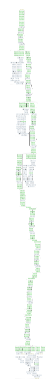

In [9]:
#Plot and show our new model architecture ...

img = mpimg.imread('yolo_early_exit_torchview.png')
plt.imshow(img)
plt.axis('off') # Hide axes
plt.show()